<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 1

## Desarrollo de una herramienta analítica usando solo Python

Este laboratorio busca evaluar las habilidades relacionadas con la primera parte del curso, correspondiente a las primeras tres semanas. Este enunciado estará disponible desde la semana 2 y deberá entregarse al final de la semana 4 en el enlace correspondiente. Su desarrollo corresponde al 30% de la calificación total del curso.

Esta actividad responde directamente al segundo objetivo del curso:
* Implementar una herramienta analítica que permita responder una pregunta de negocio para un problema sencillo de analítica de datos, utilizando únicamente algorítmica básica en Python.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para: 
1. Leer datos desde archivos.
2. Almacenar datos en  estructuras de Python.
3. Crear y llamar funciones correctamente.
4. Implementar condicionales diferenciando *if*, *elif* y *else*
5. Implementar ciclos diferenciando el propósito de *for* y *while*
6. Importar paquetes y utilizar sus funciones.

**NOTAS:**
- Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él desde el comienzo.


## Contexto: exploración del potencial para asignar becas Uniandes
La Universidad de los Andes se ha caracterizado por su compromiso con la generación de impacto en la sociedad a través de diferentes programas de becas. Programas como Quiero Estudiar, o Ser Pilo Paga, entre otros, han sido revolucionarios, al permitir que estudiantes de bajos recursos puedan acceder a una de las universidades privadas más importantes del país.

Actualmente, la Universidad quiere evaluar el potencial impacto que tendrían algunos programas de *acción afirmativa* para asignación de becas, con base en información demográfica que ha obtenido a través de encuestas. Se cuenta con información respecto a la edad, género, estado civil, estrato socio-económico, región de proveniencia, desempeño académico y nivel de escolaridad de las personas que han respondido encuestas. Los encargados de diseñar el programa saben que utilizar criterios basados en este tipo de variables es un tema sensible, pero es necesario si se quieren focalizar las oportunidades en poblaciones menos representadas.

El objetivo de este laboratorio es crear una herramienta computacional que permita a un tomador de decisiones explorar qué efecto podría tener el uso de diferentes reglas para seleccionar la población que sería beneficiaria de las becas. Puntualmente, se espera que, dadas unas reglas de selección (ej.: pertenecer a cierta región, rango de edad, etc.), la herramienta ofrezca información sobre la población potencialmente beneficiada, de forma que exista un sustento al momento de definir las reglas de selección.

## 1. Obtención e inspección de archivos

Los datos de encuestas fueron obtenidos como parte de un trabajo de campo, y por limitaciones tecnológicas, solo se cuenta con la información en archivos de texto plano. Cada archivo corresponde a una de las variables antes mencionadas y se puede garantizar que todos relacionan a las personas encuestadas en el mismo orden (i.e., la primera línea de todos los archivos corresponde a datos de la primera persona encuestada, la segunda línea a la segunda persona, etc.).

Los archivos con los que se cuenta son:
* *edades.txt*: un archivo ordenado con las edades de cada persona de la población encuestada 
* *género.txt*: un archivo ordenado con el género de cada persona de la población encuestada 
* *estado_civil.txt*: un archivo ordenado con el estado civil de cada persona de la población encuestada 
* *escolaridad.txt*: un archivo ordenado con el nivel de escolaridad de cada persona de la población encuestada 
* *estrato.txt*: un archivo ordenado con el estrato socio-económico de cada persona de la población encuestada
* *region.txt*: un archivo ordenado con la región de proveniencia de cada persona de la población encuestada

**Misión 1**

Poner en variables de Python la información que está en los archivos listados arriba.

* *Versión base*: escribe línea a línea el código necesario para poner en variables de Python la información de cada uno de los archivos.

* *Milla extra*: escribe una función que sea capaz de hacer lo anterior para un archivo y úsala en un ciclo para automatizar la lectura de los diferentes archivos.

In [1]:
# código
def cargar_txt(_filename):
    with open(_filename, encoding="UTF-8") as file:
        return file.read().splitlines()
    
def str_to_num(_list):
    float_map = map(float, _list)
    return list(float_map)
    
root_dir = "./Archivos/"
ext = ".txt"
archivos = ["edad", "escolaridad", "estado_civil", "estrato", "genero", "region", "promedio"]
datos = {label: cargar_txt(root_dir + label + ext) for label in archivos}
datos["edad"] = str_to_num(datos["edad"])
datos["promedio"] = str_to_num(datos["promedio"])

**Misión 2**

Reportar las principales características en los datos.
* *Versión base*: utilizar métricas básicas como conteos o promedios por categorías en los datos.
* *Milla extra*: utilizar visualizaciones simples como diagramas de barras, de pastel u otros.

In [2]:
# código

# importación de paquetes necesarios
import math
import matplotlib.pyplot as plt

# función que calcula la mediana de una lista de datos numéricos
def mediana(_list):
    _sorted_list = sorted(_list)
    n = len(_sorted_list)
    if n % 2 == 0:
        return (_sorted_list[n//2] + _sorted_list[n//2 - 1]) / 2
    else:
        return _sorted_list[n//2]

# función que calcula la media de una lista de datos numéricos
def media(_list):
    _media = 0
    for valor in _list:
        _media += valor
    return _media / len(_list)

# función que calcula el conteo por valor discreto (o categórico)
def conteo(_list):
    _conteo = {}
    for valor in _list:
        if valor in _conteo:
            _conteo[valor] += 1
        else:
            _conteo[valor] = 1
    return _conteo

# función que calcula la moda de una lista de datos discretos (o categóricos)
def moda(_list):
    _conteo = conteo(_list)
    max_conteo = 0
    valores = []
    for c in _conteo.values():
        if c > max_conteo:
            max_conteo = c
            
    for v, c in _conteo.items():
        if c == max_conteo:
            valores.append(v)
            
    return valores, max_conteo

# función que calcula la desviación de una lista de datos numéricos
def desviacion_estandar(_list):
    var = 0
    _media = media(_list)
    for valor in _list:
        var += ((valor - _media) ** 2)/len(_list)
    return math.sqrt(var)

In [3]:
# Presentación de métricas básicas

# La media, mediana y la desviación estándar aplicarían solo para valores numéricos continuos.
# Solo para el promedio en este caso.
def generar_estadisticas(_datos, continuos):
    estadisticas = {}
    for label, lista in _datos.items():
        if label in continuos:
            _media = round(media(lista), 2)
            _mediana = round(mediana(lista), 2)
            _sd = round(desviacion_estandar(lista), 2)
        else:
            _media = "n/a"
            _mediana = "n/a"
            _sd = "n/a"
        _moda = moda(lista)
        estadisticas[label] = {
            "media": _media,
            "sd": _sd,
            "mediana": _mediana,
            "moda": _moda[0],
            "# moda": _moda[1]
        }
    return estadisticas

def escribir_tabla_estadisticos(_datos):
    estadisticas = generar_estadisticas(_datos, {"promedio"})
    table = []
    header = ["variable", "media", "sd", "mediana", "moda(s)", "# moda(s)"]
    table.append(header)
    for variable, valores in estadisticas.items():
        row = [variable,
               str(valores["media"]),
               str(valores["sd"]),
               str(valores["mediana"]),
               str(valores["moda"]),
               str(valores["# moda"])]
        table.append(row)
    for row in table:
        print("{: >15} {: >15} {: >15} {: >15} {: >15} {: >15}".format(*row))

escribir_tabla_estadisticos(datos)

       variable           media              sd         mediana         moda(s)       # moda(s)
           edad             n/a             n/a             n/a          [24.0]              14
    escolaridad             n/a             n/a             n/a  ['Secundaria']             343
   estado_civil             n/a             n/a             n/a      ['casada']             199
        estrato             n/a             n/a             n/a           ['2']             185
         genero             n/a             n/a             n/a    ['femenino']             251
         region             n/a             n/a             n/a      ['Caribe']             193
       promedio            2.62            1.12             2.7           [3.0]              37


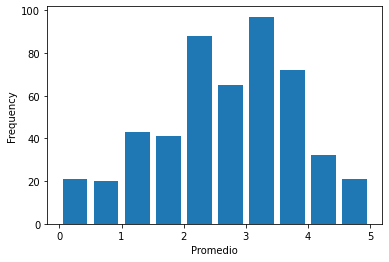

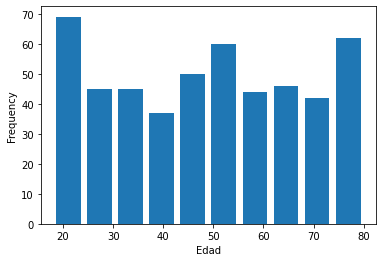

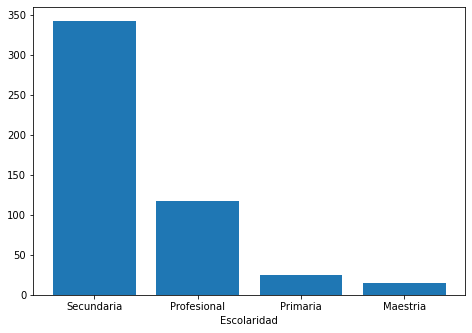

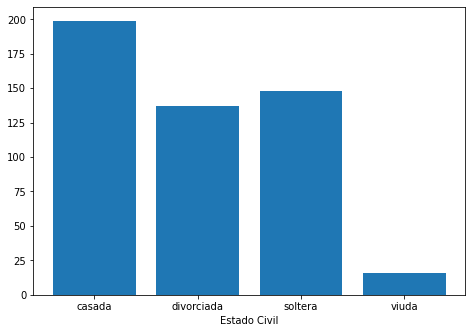

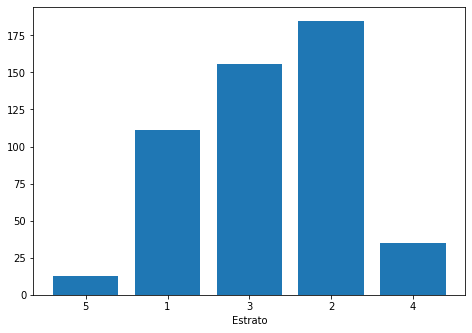

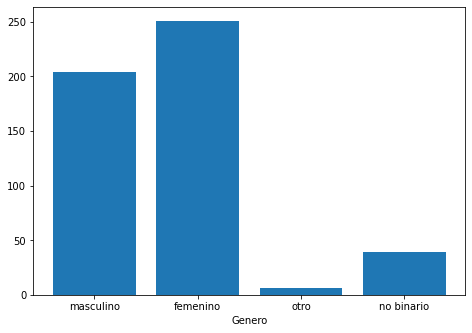

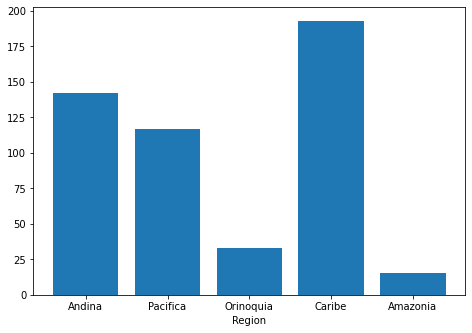

In [4]:
def my_plot(data, hist_mode=False, label='Data', n=10):
    if hist_mode:
        plt.hist(data, bins=n, rwidth=0.8)
        plt.ylabel('Frequency')
        plt.xlabel(label)
    else:
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        _conteo = conteo(data)
        ax.bar(_conteo.keys(), _conteo.values())
        plt.xlabel(label)
    plt.show()
    

def plot_all(_datos):
    my_plot(_datos["promedio"], hist_mode=True, label='Promedio')
    my_plot(_datos["edad"], hist_mode=True, label='Edad')
    my_plot(_datos["escolaridad"], label="Escolaridad")
    my_plot(_datos["estado_civil"], label="Estado Civil")
    my_plot(_datos["estrato"], label="Estrato")
    my_plot(_datos["genero"], label="Genero")
    my_plot(_datos["region"], label="Region")
    
plot_all(datos)

## 2. Abordaje de la pregunta de negocio

El comité encargado de diseñar el programa de becas ha tenido dificultades para llegar a acuerdos. Algunos piensan que el criterio principal de selección debería ser respecto a lo económico y académico, sin importar otras características personales, mientras que otros piensan que considerar estas características es, de hecho, parte del espíritu del programa.

* El primer grupo sugiere que se deben tomar en orden ascendente los estratos y elegir, en cada uno de ellos, al 2% de personas con promedio académico superior en esa sub-población, hasta que se agoten las becas disponibles. En caso de quedar becas disponibles al final del proceso, se repite el mismo esquema, considerando que ya no se tienen en cuenta las personas que hayan sido elegidas en rondas anteriores.

* El segundo grupo sugiere que los recibidores de becas deben estar igualmente distribuidos entre las diferentes regiones y generos, considerando, por supuesto, que para cada una de esas sub-poblaciones, las personas elegidas sean las de mejores promedios académicos.

Dado que las diferencias entre estos grupos obedecen a su entendimiento particular del problema, el presidente del comité propone utilizar los datos disponibles de las encuestas, sugiriendo que se analice qué características tendría la población de elegidos bajo cada uno de los dos criterios expuestos.

**Misión 3**

Defina la pregunta de negocio y la pregunta de *analytics* para esta situación.

In [5]:
# respuesta en texto (solo leeremos los primeros 300 caracteres de la respuesta)

pregunta_negocio = '¿Cual es el mejor procedimiento para la asignación de becas?'

pregunta_analytics = '¿Qué características surgen de la realización de cada procedimiento con respecto '\
'a la población que me permiten comparar y tomar una decisión?'

print("Pregunta de negocio:")
print(pregunta_negocio)
print("")
print("Pregunta Analytics:")
print(pregunta_analytics)

Pregunta de negocio:
¿Cual es el mejor procedimiento para la asignación de becas?

Pregunta Analytics:
¿Qué características surgen de la realización de cada procedimiento con respecto a la población que me permiten comparar y tomar una decisión?


**Misión 4**

Desarrollar un algoritmo que permita conocer la población que sería becada según los criterios propuestos por el *primer grupo* mencionado arriba.

In [6]:
# código
def procedimiento_1(_datos, proporcion, nbecas):
    grupo = "estrato"
    if proporcion <= 0:
        return {}
    
    grupos = {}
    for indice, grupo_promedio in enumerate(zip(_datos[grupo], _datos["promedio"])):
        if grupo_promedio[0] in grupos:
            grupos[grupo_promedio[0]].append((indice, grupo_promedio[1]))
        else:
            grupos[grupo_promedio[0]] = [(indice, grupo_promedio[1])]
    
    sorted_grupos = sorted(grupos)
    becados = set()
    
    while len(becados) < nbecas:
        safe_check = 0
        for grupo in sorted_grupos:
            promedios = [p[1] for p in grupos[grupo]]
            media_grupo = media(promedios)
            disponibilidad = math.floor(len(promedios) * proporcion)
            if disponibilidad > 0:
                becados_grupo = 0
                # arbitrariamente decido que hay prioridad en los mejores promedios
                estudiantes_sorted = sorted(grupos[grupo], reverse=True, key=lambda x: x[1])
                for estudiante in estudiantes_sorted:
                    if estudiante[0] not in becados and estudiante[1] > media_grupo:
                        safe_check += 1
                        becados_grupo += 1
                        becados.add(estudiante[0])
                        if len(becados) >= nbecas or becados_grupo >= disponibilidad:
                            break
                    if estudiante[1] <= media_grupo:
                        break
            if len(becados) >= nbecas:
                break
        if safe_check == 0:
            break
            
    # devolvemos un dict igual al inicial para poderlos comparar
    n_datos = {}
    for label, valores in _datos.items():
        n_datos[label] = [v for i, v in enumerate(valores) if i in becados]
    
    return n_datos

**Misión 5**

Desarrollar un algoritmo que permita conocer la población que sería becada según los criterios propuestos por el *segundo grupo* mencionado arriba.

In [30]:
# código
def procedimiento_2(_datos, prop_region, prop_genero, nbecas):
    conteo_regiones = conteo(_datos["region"])
    conteo_genero = conteo(_datos["genero"])

    grupos = {}
    for indice, grupo_promedio in enumerate(zip(_datos["region"], _datos["promedio"])):
        if grupo_promedio[0] in grupos:
            grupos[grupo_promedio[0]].append((indice, grupo_promedio[1]))
        else:
            grupos[grupo_promedio[0]] = [(indice, grupo_promedio[1])]
            
    becados = set()
    
    while len(becados) < nbecas:
        safe_check = 0
        for grupo in grupos:
            promedios = [p[1] for p in grupos[grupo]]
            disponibilidad = math.floor(len(promedios) * prop_region[grupo])
            if disponibilidad > 0:
                becados_grupo = 0
                estudiantes_sorted = sorted(grupos[grupo], reverse=True, key=lambda x: x[1])
                for estudiante in estudiantes_sorted:
                    becados_subgrupo = 0
                    for genero in conteo_genero.keys():
                        disponibilidad_2 = math.floor(disponibilidad * prop_genero[genero])
                        if disponibilidad_2 > 0:
                            if estudiante[0] not in becados:
                                if _datos["genero"][estudiante[0]] == genero:
                                    safe_check += 1
                                    becados_subgrupo += 1
                                    becados.add(estudiante[0])
                                    if len(becados) >= nbecas or becados_subgrupo >= disponibilidad_2:
                                        break
                    becados_grupo += becados_subgrupo
                    if len(becados) >= nbecas or becados_grupo >= disponibilidad:
                        break
            if len(becados) >= nbecas:
                break
        if safe_check == 0:
            break
            
    # devolvemos un dict igual al inicial para poderlos comparar
    n_datos = {}
    for label, valores in _datos.items():
        n_datos[label] = [v for i, v in enumerate(valores) if i in becados]
        
    return n_datos

**Misión 6**

Desarrollar un algoritmo, a partir de lo anterior, cuyo resultado permita al comité comparar fácilmente las características de las dos poblaciones hipotéticas que recibirían becas.

*Ayuda*: considera utilizar tus implementaciones de la *Misión 2* para facilitar esta misión.

In [27]:
# código
nbecas = 50

In [28]:
def comparacion(proc_1, proc_2):
    '''
    Procedimiento 1
    '''
    print('-----------Procedimiento 1-----------')
    escribir_tabla_estadisticos(proc_1)
    print('Total: {}'.format(len(proc_1["promedio"])))
    
    plot_all(proc_1)
    
    '''
    Procedimiento 2
    '''
    print('-----------Procedimiento 2-----------')
    escribir_tabla_estadisticos(proc_2)
    print('Total: {}'.format(len(proc_2["promedio"])))
    
    plot_all(proc_2)

-----------Procedimiento 1-----------
       variable           media              sd         mediana         moda(s)       # moda(s)
           edad             n/a             n/a             n/a          [54.0]               4
    escolaridad             n/a             n/a             n/a  ['Secundaria']              34
   estado_civil             n/a             n/a             n/a      ['casada']              24
        estrato             n/a             n/a             n/a      ['2', '3']              18
         genero             n/a             n/a             n/a    ['femenino']              25
         region             n/a             n/a             n/a ['Andina', 'Caribe']              16
       promedio            4.37            0.35             4.3           [4.0]              11
Total: 50


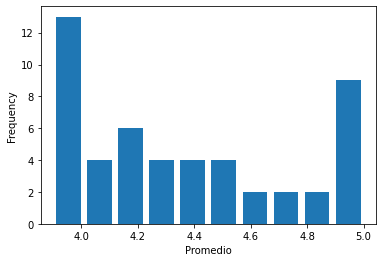

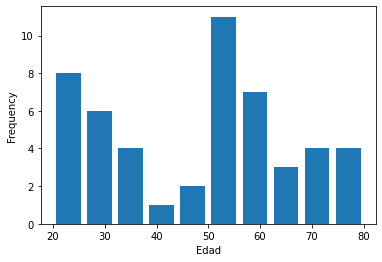

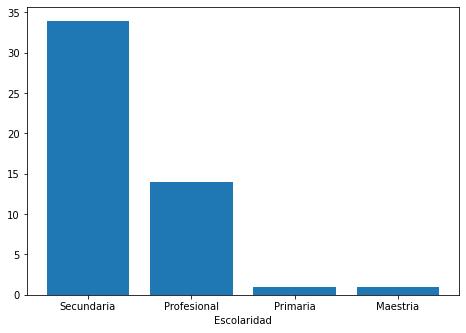

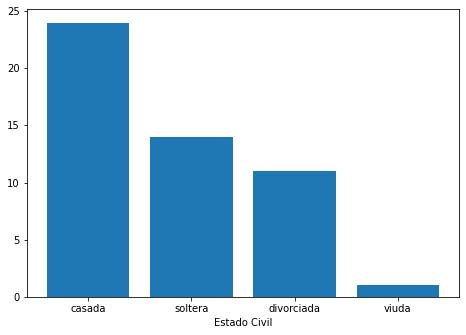

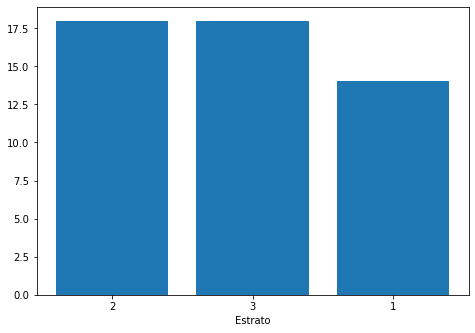

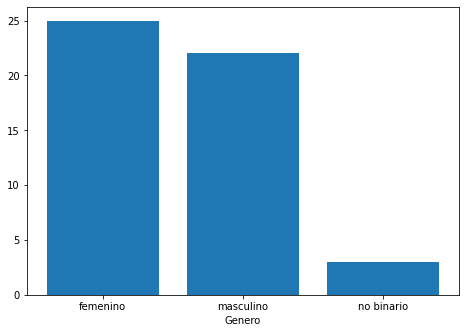

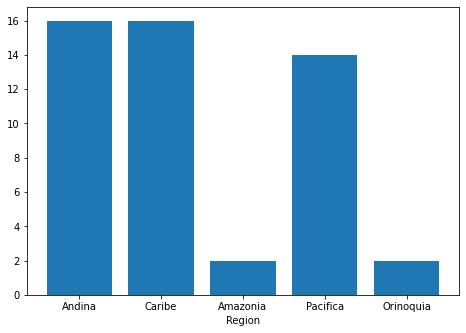

-----------Procedimiento 2-----------
       variable           media              sd         mediana         moda(s)       # moda(s)
           edad             n/a             n/a             n/a          [54.0]               5
    escolaridad             n/a             n/a             n/a  ['Secundaria']              30
   estado_civil             n/a             n/a             n/a      ['casada']              20
        estrato             n/a             n/a             n/a           ['1']              17
         genero             n/a             n/a             n/a   ['masculino']              24
         region             n/a             n/a             n/a      ['Andina']              28
       promedio            4.21            0.42             4.0      [4.0, 3.8]               8
Total: 50


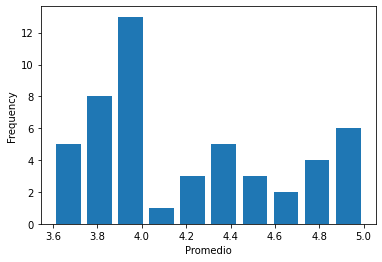

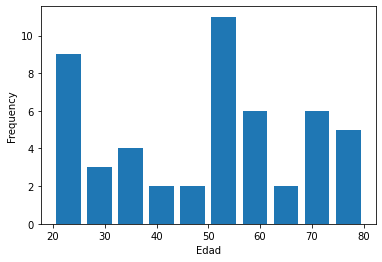

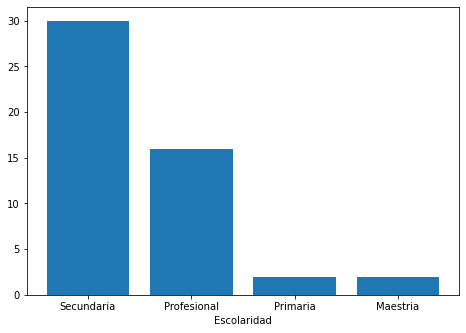

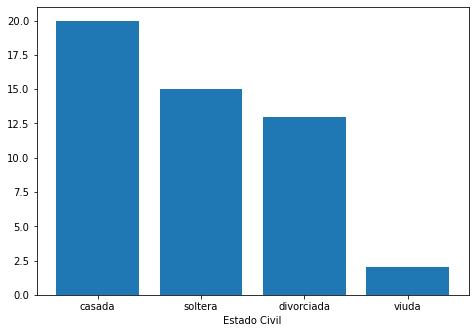

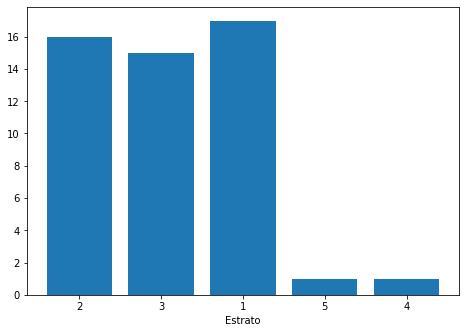

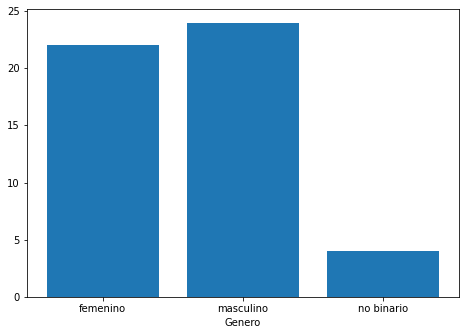

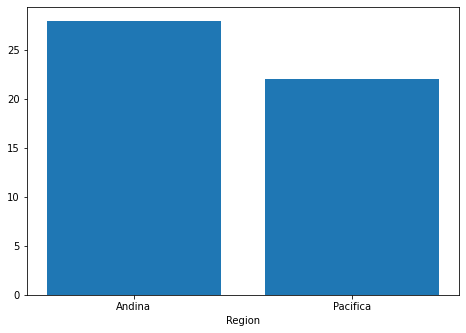

In [31]:
'''
Procedimiento 1
'''
proc_1 = procedimiento_1(datos, 0.02, nbecas)

'''
Procedimiento 2
'''

prop_region = {
        "Andina": 0.2, "Pacifica": 0.2, "Orinoquia": 0.2, "Caribe": 0.2, "Amazonia": 0.2
    }
prop_genero = {
        "masculino": 0.25, "femenino": 0.25, "otro": 0.25, "no binario": 0.25
    }

proc_2 = procedimiento_2(datos, prop_region, prop_genero, nbecas)


comparacion(proc_1, proc_2)

## 3. Desarrollo de una solución analítica

Reconociendo la complejidad de este problema (que no permite reducirlo a una dicotomía) y viendo el potencial del análisis de datos para enriquecer la discusión y los insumos para tomar decisiones, el comité ha solicitado una herramienta analítica que les permita . Sus requerimientos son:

* La herramienta debe permitir ingresar una política de selección de becados.
    * Se debe poder elegir el rango de edad de los aspirantes.
    * Se debe poder elegir qué proporción de las becas se asigna a cada género, a cada estrato, o a cada región (pero sólo debe elegirse uno de estos criterios).
* La herramienta debe generar un resultado que permita al comité analizar las características de la población potencialmente elegida si se usara la política ingresada.

**Misión 7**

Desarrollar, a partir de lo construido hasta el momento, un algoritmo que permita cumplir con los requerimientos del comité.

In [46]:
# código
'''
Dado que el enunciado no es muy claro, asumo que la proporción del estrato aplica al criterio del grupo 1 
y corresponde a la proporción que se debe sacar de cada estrato (parametrizar el 2% inicial). La proporción 
de género y región aplica al grupo 2 y correspondería a los porcentajes que se quieren forzar en cada región 
o género (Parametrizar lo que se enuncia como 'igualmente distribuidos' inicialmente).
'''

def herramienta(_datos, edades=None, proporcion_estrato=None, proporcion_region=None, proporcion_genero=None):
    datos_aplicables = _datos
    if edades != None:
        aplicables = {estudiante for estudiante, edad in enumerate(_datos["edad"]) if edades[0] <= edad <= edades[1]}
        for label, valores in _datos.items():
            datos_aplicables[label] = [v for e, v in enumerate(valores) if e in aplicables]
    return datos_aplicables
            
            
herramienta(datos, edades=(25, 30))

{'edad': [26.0,
  30.0,
  26.0,
  30.0,
  30.0,
  27.0,
  30.0,
  27.0,
  28.0,
  29.0,
  29.0,
  26.0,
  27.0,
  29.0,
  28.0,
  29.0,
  27.0,
  27.0,
  30.0,
  27.0,
  25.0,
  30.0,
  29.0,
  29.0,
  28.0,
  30.0,
  30.0,
  29.0,
  25.0,
  26.0,
  27.0,
  29.0,
  27.0,
  28.0,
  27.0,
  28.0,
  30.0,
  28.0,
  25.0,
  25.0,
  29.0,
  29.0,
  27.0,
  26.0,
  25.0],
 'escolaridad': ['Secundaria',
  'Secundaria',
  'Secundaria',
  'Maestria',
  'Secundaria',
  'Secundaria',
  'Secundaria',
  'Profesional',
  'Secundaria',
  'Secundaria',
  'Secundaria',
  'Secundaria',
  'Secundaria',
  'Secundaria',
  'Maestria',
  'Secundaria',
  'Secundaria',
  'Profesional',
  'Secundaria',
  'Profesional',
  'Secundaria',
  'Secundaria',
  'Secundaria',
  'Profesional',
  'Secundaria',
  'Secundaria',
  'Secundaria',
  'Profesional',
  'Profesional',
  'Secundaria',
  'Secundaria',
  'Secundaria',
  'Secundaria',
  'Secundaria',
  'Primaria',
  'Secundaria',
  'Secundaria',
  'Secundaria',
  'Maest

**Misión 8**

Proponer, con base en tu propio uso de la herramienta, una política de ingreso que consideres apropiada dado el contexto proporcionado. Si lo crees adecuado, explica, máximo 500 caracteres, las virtudes de tu propuesta (esto puede estar soportado en los datos, o no).

In [ ]:
# respuesta en texto (solo leeremos los primeros 300 caracteres de la respuesta)

respuesta = ''

**Misión 9**

Ejecutar el algoritmo desarrollado en la *Misión 7* sobre la política que sugieres proponer al comité. Explicar claramente tus conlusiones con el soporte de los resultados de la herramienta.

In [ ]:
# código

conclusion = ''

## Referencias
* Discriminación Positiva<br> 
https://es.wikipedia.org/wiki/Discriminaci%C3%B3n_positiva
* Análisis de formulación del programa “Ser Pilo Paga”<br>
https://repository.urosario.edu.co/handle/10336/12526
* La acción afirmativa en la Universidad de los Andes: El caso del programa "Oportunidades para talentos nacionales"<br> http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0123-885X2004000300005
* Acción afirmativa y equidad: un análisis desde la propuesta de Thomas Nagel<br>
http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S2007-24062016000200049

## Créditos

Camilo Gómez - 11/06/21<br>
*Revisado*: 25/08/21